---
# <center><font style="color: purple;">Movie Rating Prediction</font></center>    
---
* <font color="purple">Author : ***H. Moustapha Ousmane***<br>

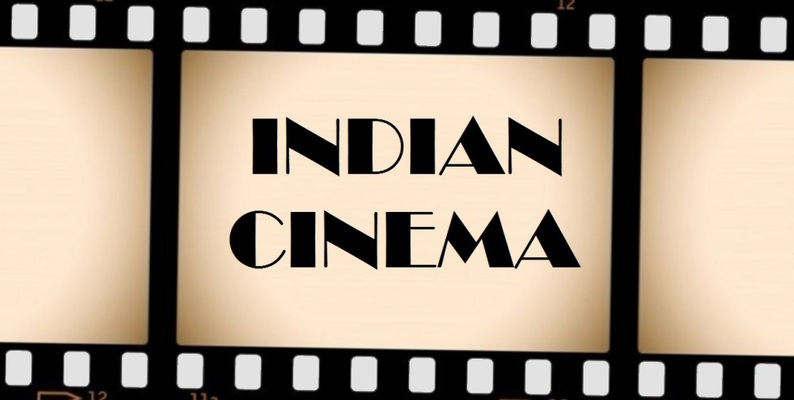

## <center><font color="purple">Synopsis</font></center>
In this project, we are going to build a model that predicts the rating of a movie based on features like genre, director, and actors. We will be using regression techniques to tackle this problem. The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.

We will be going through this project as follows :
* First, we will do an *Exploratory data analysis*;
* Second, we will doa *Data preprocessing*;
* Then, *Feature engineering*;
* And finaly, we are going to use *Machine learning modeling techniques*.

This project will provide insights into the factors that influence movie ratings and allows us to build a model that can estimate the ratings of movies accurately.
The dataset used in this project could be found [here](https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies).

## <center><font color="purple"> Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

## <center><font color="purple">1. Exploratory data analysis
### <center><font color="purple">2.1 Dataset Loading
    First thing first, let's load our dataset

In [2]:
data = pd.read_csv ("IMDb Movies India.csv", encoding='ISO-8859-1')
data.head ()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### <center><font color="purple">2.2 Descriptive Statistics

In [3]:
print (f"Shape of the dataset : {data.shape}")
print (f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")
print ("=======================================\n")

print (f"Data (variables) types :\n{data.dtypes}")
print ("\========================================\n")

# Columns with NaN values
nan_cols = [col for col in data.columns if data [col].isna ().sum () > 0]
for item in nan_cols :
    nans = data[item].isna ().sum ()
    nans_percentage = round ((nans / len (data)) * 100, 3)
    print (f"The variable \"{item}\" has {nans} missing values, which represents {nans_percentage} % of the dataset.\n")
print ("\========================================\n")

data.describe ()

Shape of the dataset : (15509, 10)
The dataset has 15509 rows and 10 columns.

Data (variables) types :
Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object
\========================================

The variable "Year" has 528 missing values, which represents 3.404 % of the dataset.

The variable "Duration" has 8269 missing values, which represents 53.317 % of the dataset.

The variable "Genre" has 1877 missing values, which represents 12.103 % of the dataset.

The variable "Rating" has 7590 missing values, which represents 48.939 % of the dataset.

The variable "Votes" has 7589 missing values, which represents 48.933 % of the dataset.

The variable "Director" has 525 missing values, which represents 3.385 % of the dataset.

The variable "Actor 1" has 1617 missing values, which represents 10.426 % of the dataset.

The variable

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [4]:
# Numerical columns
print ("Numerical variable :")
num_cols = data._get_numeric_data ().columns
for item in num_cols :
    print (item)
print ()
# Categorical columns
print ("Categorical variables :")
cat_cols = (data.drop (num_cols, axis = 1)).columns
for item in cat_cols :
    print (item)

Numerical variable :
Rating

Categorical variables :
Name
Year
Duration
Genre
Votes
Director
Actor 1
Actor 2
Actor 3


## <center><font color="purple">3. Data preprocessing
As seen  in the previous cells, there are many missing values and all the variables are categorical except one (`Rating`).
### <center><font color="purple">3.1 Handling Missing (NaN) Values</font></center>
In order to ensure accurate analysis and modeling, let's handle the missing values in the dataset. In this process, we are going to use the easy and simple methode of handling missing values. So, we are just going to drop each row that has a missing value.

In [5]:
data = data.drop(['Name'], axis = 1)
data.dropna (inplace = True)
data.isna ().sum ()

Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [6]:
data.head ()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### <center><font color="purple">3.2 Handling Duplicates</font></center>

In [7]:
# Count the number of duplicated values
data.duplicated ().sum ()

0

Ther no duplicate values so nothing to do here.

### <center><font color="purple">3.3 Encoding Categorical Features</font></center>
To avoid potential bias or assumtions by the coming algorithms, let's convert our categorical variables into numerical ones using the `LabelEncoder()` method.

In [8]:
# Convert categorical variable to numerical
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])
data['Director'] = le.fit_transform(data['Director'])
data['Actor 1'] = le.fit_transform(data['Actor 1'])
data['Actor 2'] = le.fit_transform(data['Actor 2'])
data['Actor 3'] = le.fit_transform(data['Actor 3'])

data.head ()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),109 min,229,7.0,8,629,1352,2272,319
3,(2019),110 min,184,4.4,35,1335,1198,719,2148
5,(1997),147 min,157,4.7,827,1530,378,75,2045
6,(2005),142 min,289,7.4,"1,086",2044,692,1112,2524
8,(2012),82 min,320,5.6,326,135,1934,1175,1013


### <center><font color="purple">3.4 Extractin Numerical Features</font></center>
Now, let's extract the year, the duration and the votes respectively from the columns `'Year', 'Duration', 'Votes'` using a simple regular expression `'(\d+)'` and then covert those columns to numeric.

In [9]:
data ['Year'] = data ['Year'].str.extract ('(\d+)')
data ['Year'] = pd.to_numeric (data ['Year'], errors = 'coerce')

data ['Duration'] = data ['Duration'].str.extract ('(\d+)')
data ['Duration'] = pd.to_numeric (data ['Duration'], errors = 'coerce')

data ['Votes'] = data ['Votes'].str.extract ('(\d+)')
data ['Votes'] = pd.to_numeric (data ['Votes'], errors = 'coerce')
data.head ()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,7.0,8,629,1352,2272,319
3,2019,110,184,4.4,35,1335,1198,719,2148
5,1997,147,157,4.7,827,1530,378,75,2045
6,2005,142,289,7.4,1,2044,692,1112,2524
8,2012,82,320,5.6,326,135,1934,1175,1013


In [10]:
data.dtypes

Year          int64
Duration      int64
Genre         int64
Rating      float64
Votes         int64
Director      int64
Actor 1       int64
Actor 2       int64
Actor 3       int64
dtype: object

## <center><font color="purple">4. Feature engineering
In this process, we will split the dataset into feateres `X` and target `y`. Then we split each of the features and the target into `training` and `testing` sets.

In [11]:
X = data.drop (['Rating'], axis = 1)
y = data ['Rating']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

## <center><font color="purple">5. Machine learning modeling techniques

### <center><font color="purple">4. Building Prediction models</font></center>

Our goal here is to predict the movie rationg. To do so, we are going to use the following classification algorithms :
1. Linear Regression
2. Random Forest Regressor

Note: *The are several other classification algorithms that could also do the work*

### <center><font color="purple">4.1. Linear Regression</font></center>

In [12]:
# Model : LogisticRegression
linear_reg_model = LinearRegression()

# Training the model
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Make predictions on the test set
lr_y_pred = linear_reg_model.predict(X_test)
lr_y_pred

array([5.71929145, 5.89858467, 6.01623272, ..., 5.71980906, 5.70048653,
       6.5099881 ])

In [14]:
# Evaluate the Linear Regression model
mse = mean_squared_error(y_test, lr_y_pred)
print(f"Linear Regression Model's Mean Squared Error: {mse}")

Linear Regression Model's Mean Squared Error: 1.7584782505295302


In [15]:
# Model : RandomForestRegressor
rfr_model = RandomForestRegressor()

# Fitting the model
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
# Predict the value of y
rfr_y_pred = rfr_model.predict(X_test)
rfr_y_pred

array([4.794, 6.388, 4.99 , ..., 5.7  , 5.684, 6.228])

In [17]:
# Evaluating the Random Forest Regressor  model
mse = mean_squared_error(y_test, rfr_y_pred)
print(f"Randon Forest Regressor's Mean Squared Error: {mse}")

Randon Forest Regressor's Mean Squared Error: 1.3820939832155477
